In [1]:
import numpy as np
import cv2
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load preprocessed data for DNN
file_path = '/content/drive/MyDrive/NLP_Workspace/Data/'

df_data = pd.read_csv(file_path + "post_vectorized_withEmojis.csv")
df_label = pd.read_csv(file_path + "post_labels.csv")


# with open(file_path + 'post_vectorized.csv', 'r') as file:
#   csvreader = csv.reader(file)
#   example = 0
#   for row in csvreader:
#     if example == 0:
#       example += 1
#     else:
#       if example == 1:
#         print(row)
#       #fetched_data[example] = np.array([float(x) for x in row[1]].append(row[3]))
#       example+=1

In [4]:
df_data

,0,1,2,3,4,5,6,7,8,9,...,293,294,295,296,297,298,299,0.1,1.1,2.1
0,0.065186,0.810913,-0.424438,0.985718,-0.627441,0.018433,0.271118,-1.772049,1.621460,1.295776,...,0.281433,-0.813477,-0.765564,0.453857,0.092773,0.160400,-0.644424,0.0,0.0,0.0
1,0.556641,0.122620,-0.147461,0.620117,-0.356201,-0.105072,-0.055115,0.954971,0.568359,0.516357,...,-0.581055,0.157715,0.022217,0.598633,-0.303467,-0.288818,-0.311279,0.0,0.0,0.0
2,0.234177,0.639679,0.128906,0.872681,-2.454506,0.057007,1.116470,-0.437820,0.722595,1.275543,...,0.111328,-0.455597,0.569593,1.221680,-0.642319,-0.028374,-0.479736,0.0,0.0,0.0
3,0.630447,0.592880,-0.062744,0.198242,-0.404785,-0.137329,0.169678,-0.684570,1.182190,0.313721,...,0.606445,-0.595337,-0.458984,-0.046387,-0.781006,-0.011658,-0.458740,0.0,0.0,0.0
4,-0.179688,0.057129,0.141602,-0.077148,-0.092285,-0.013855,0.080078,-0.049561,-0.009766,0.390625,...,0.066406,0.237305,0.039795,-0.045166,0.074707,0.056396,0.022095,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198648,0.746704,1.512817,0.817108,1.307129,-1.160400,-0.089966,0.732819,-0.624146,1.352020,1.513428,...,0.083618,-1.026611,0.221924,0.161346,-0.108917,-1.011108,-1.281494,0.0,0.0,0.0
198649,0.895874,0.130310,-0.767822,0.342529,-1.021118,0.400513,1.218822,-0.821753,1.511292,1.150696,...,0.544556,-0.479553,-1.614227,0.929260,-0.282135,-0.044678,-0.685371,0.0,0.0,0.0
198650,1.013489,-0.104675,-0.219727,0.720093,0.005859,1.388794,1.662613,-1.142090,1.940308,0.158997,...,-0.549622,-1.231842,-0.134247,0.291626,-0.566910,-0.305664,-0.630733,0.0,0.0,0.0
198651,1.055298,2.031052,0.295105,2.163452,-2.274086,-0.459106,1.272461,-0.235779,1.697021,2.164795,...,-0.011902,-2.019348,-0.414673,-0.584885,-1.511169,0.237366,0.396973,0.0,0.0,0.0


In [5]:
df_label.describe()

,0
count,198653.000000
mean,7.495870
std,4.610907
min,0.000000
25%,3.000000
50%,7.000000
75%,11.000000
max,15.000000


In [6]:
df_label.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
# with open(file_path + 'post_labels.csv', 'r') as file:
#   csvreader1 = csv.reader(file)
#   labels = list(csvreader1)
# for i in range (0, 20):
#   index = random.randint(0, len(labels))
#   print(labels[index], index)

In [7]:
fetched_data = df_data.to_numpy()
len(fetched_data), len(fetched_data[0])

(198653, 303)

In [8]:
Labels = df_label.to_numpy().flatten()
len(Labels), Labels[0]

(198653, 0)

In [9]:
Labels

array([ 0,  0,  0, ..., 15, 15, 15])

In [10]:
LENGTH_DATA = len(df_label)

import random
train_example_nums = int(0.85 * LENGTH_DATA)
test_example_nums = int(0.15 * LENGTH_DATA)

random_ids = [i for i in range(LENGTH_DATA)]
random.Random(4).shuffle(random_ids)

random_train_ids = random_ids[:train_example_nums]
random_test_ids = random_ids[train_example_nums:]

print(len(random_train_ids), len(random_test_ids))


X_train = torch.as_tensor(fetched_data[random_train_ids])
Y_train = torch.as_tensor(Labels[random_train_ids]).type(torch.int64)

X_test = torch.as_tensor(fetched_data[random_test_ids])
Y_test = torch.as_tensor(Labels[random_test_ids]).type(torch.int64)


168855 29798


In [11]:
print(X_train)

tensor([[ 0.6941,  0.2159,  0.2418,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.6475,  0.2078, -0.2631,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 1.5310,  0.5859, -0.0317,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5305,  0.3452,  0.4175,  ...,  0.0000,  0.0000,  0.0000],
        [-1.1775,  1.1608,  0.1592,  ...,  0.0000,  0.0000,  0.0000]],
       dtype=torch.float64)


In [12]:
print(Y_train)

tensor([ 4,  1,  9,  ...,  0,  7, 14])


In [13]:
class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, X, Y):
    self.labels = Y
    self.posts = X

  def __len__(self):
    return len(self.posts)

  def __getitem__(self, index):
    post = self.posts[index]
    label = self.labels[index]
    return post, label

In [14]:
train_dataset = Dataset(X_train, Y_train)
test_dataset = Dataset(X_test, Y_test)

print(min(Y_train), max(Y_train))
print(Y_test)

tensor(0) tensor(15)
tensor([ 3, 14,  9,  ...,  2,  6,  4])


In [15]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [42]:
class ClassificationBase(nn.Module):
    def training_step(self, batch):
        posts, labels = batch 
        out = self(posts.type(torch.FloatTensor).to(device))                  # Generate predictions
        loss = F.cross_entropy(out, labels.to(device)) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        posts, labels = batch
        out = self(posts.type(torch.FloatTensor).to(device))                    # Generate predictions
        loss = F.cross_entropy(out, labels.to(device))   # Calculate loss
        acc = accuracy(out, labels.to(device))           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [43]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [44]:
device = get_default_device()
device

device(type='cuda')

In [45]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr, momentum = 0.9)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [46]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [47]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [48]:
class DNN(ClassificationBase):
  def __init__(self) -> None:
    super().__init__()
    self.fc1 = torch.nn.Linear(303, 256)
    self.fc2 = torch.nn.Linear(256, 128)
    self.fc3 = torch.nn.Linear(128, 128)
    self.fc4 = torch.nn.Linear(128, 128)
    self.fc5 = torch.nn.Linear(128, 16)


  def forward(self, x: torch.Tensor) -> torch.Tensor:     
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)
    x = F.relu(x)
    x = self.fc4(x)
    x = F.relu(x)
    x = self.fc5(x)
    return x

In [49]:
model = DNN()
model.to(device)


DNN(
  (fc1): Linear(in_features=303, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=16, bias=True)
)

In [50]:
batch_size = 32

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, num_workers=1, shuffle = True, pin_memory=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size*4, num_workers=1, pin_memory=True)

In [51]:
history = [evaluate(model, test_dataloader)]
history

[{'val_loss': 2.7741200923919678, 'val_acc': 0.06179718300700188}]

In [52]:
history += fit(20, 0.0001 , model, train_dataloader, test_dataloader)

Epoch [0], val_loss: 2.7732, val_acc: 0.0619
Epoch [1], val_loss: 2.7728, val_acc: 0.0627
Epoch [2], val_loss: 2.7725, val_acc: 0.0636
Epoch [3], val_loss: 2.7723, val_acc: 0.0651
Epoch [4], val_loss: 2.7721, val_acc: 0.0676
Epoch [5], val_loss: 2.7719, val_acc: 0.0690
Epoch [6], val_loss: 2.7717, val_acc: 0.0730
Epoch [7], val_loss: 2.7715, val_acc: 0.0724
Epoch [8], val_loss: 2.7713, val_acc: 0.0729
Epoch [9], val_loss: 2.7710, val_acc: 0.0729
Epoch [10], val_loss: 2.7707, val_acc: 0.0728
Epoch [11], val_loss: 2.7704, val_acc: 0.0726
Epoch [12], val_loss: 2.7699, val_acc: 0.0728
Epoch [13], val_loss: 2.7694, val_acc: 0.0727
Epoch [14], val_loss: 2.7688, val_acc: 0.0735
Epoch [15], val_loss: 2.7681, val_acc: 0.0746
Epoch [16], val_loss: 2.7672, val_acc: 0.0753
Epoch [17], val_loss: 2.7660, val_acc: 0.0767
Epoch [18], val_loss: 2.7646, val_acc: 0.0806
Epoch [19], val_loss: 2.7627, val_acc: 0.0854


In [53]:
history += fit(20, 0.00001 , model, train_dataloader, test_dataloader)

Epoch [0], val_loss: 2.7624, val_acc: 0.0857
Epoch [1], val_loss: 2.7622, val_acc: 0.0857
Epoch [2], val_loss: 2.7620, val_acc: 0.0855
Epoch [3], val_loss: 2.7618, val_acc: 0.0859
Epoch [4], val_loss: 2.7615, val_acc: 0.0862
Epoch [5], val_loss: 2.7613, val_acc: 0.0866
Epoch [6], val_loss: 2.7611, val_acc: 0.0866
Epoch [7], val_loss: 2.7608, val_acc: 0.0868
Epoch [8], val_loss: 2.7606, val_acc: 0.0874
Epoch [9], val_loss: 2.7603, val_acc: 0.0872
Epoch [10], val_loss: 2.7600, val_acc: 0.0874
Epoch [11], val_loss: 2.7598, val_acc: 0.0873
Epoch [12], val_loss: 2.7595, val_acc: 0.0873
Epoch [13], val_loss: 2.7592, val_acc: 0.0876
Epoch [14], val_loss: 2.7589, val_acc: 0.0879
Epoch [15], val_loss: 2.7586, val_acc: 0.0879
Epoch [16], val_loss: 2.7584, val_acc: 0.0884
Epoch [17], val_loss: 2.7581, val_acc: 0.0882
Epoch [18], val_loss: 2.7578, val_acc: 0.0885
Epoch [19], val_loss: 2.7575, val_acc: 0.0886


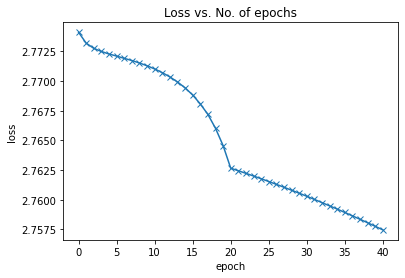

In [54]:
plot_losses(history)

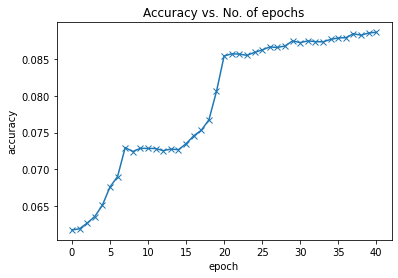

In [55]:
plot_accuracies(history)

In [56]:
evaluate(model, test_dataloader)

{'val_loss': 2.7574594020843506, 'val_acc': 0.08862121403217316}

In [57]:
torch.save(model.state_dict(), 'emotion_classification-feedforward.pth')